In [7]:
# Imports
import PySimpleGUI as sg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import scipy
import numpy as np
from PIL import Image, ImageTk
import random
import metrics


In [8]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")
mat_data = scipy.io.loadmat(file_path)
# print(mat_data.keys())
# for key in mat_data.keys():
#     print(key)
#     print(mat_data[key])
    

print(mat_data["trialInfo"][100][0])

In [9]:
object_list = {
    92: 'abs1',
    94: 'abs2',
    93: 'abs3',
    95: 'abs4',
    96: 'abs5',
    91: 'abs6',

    51: 'hcyl1',
    52: 'hcyl2',
    12: 'hcyl3',
    53: 'hcyl4',
    54: 'hcyl5',
    55: 'hcyl6',
    56: 'hcyl7',

    15: 'box1',
    61: 'box2',
    62: 'box3',
    63: 'box4',
    64: 'box5',
    65: 'box6',
    66: 'box7',

    16: 'ring5',
    24: 'ring4',
    25: 'ring6',
    26: 'ring7',
    23: 'ring3',
    21: 'ring1',
    22: 'ring2',

    71: 'vcyl1',
    72: 'vcyl2',
    73: 'vcyl3',
    74: 'vcyl4',
    75: 'vcyl5',
    76: 'vcyl6',

    11: 'sphere1',
    41: 'sphere2',
    14: 'sphere5',
    44: 'sphere6',
    42: 'sphere3',
    43: 'sphere4',
    45: 'sphere7',
    46: 'sphere8',

    31: 'cube1',
    32: 'cube2',
    13: 'cube4',
    33: 'cube5',
    35: 'cube6',
    36: 'cube3',
    34: 'cube7',

    # 00:
    # 01:
    }

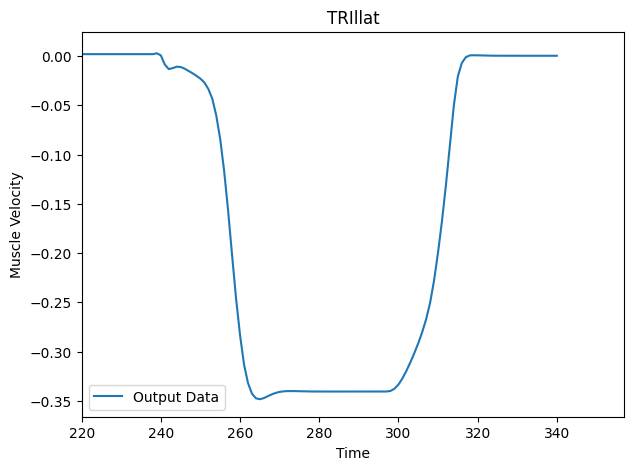

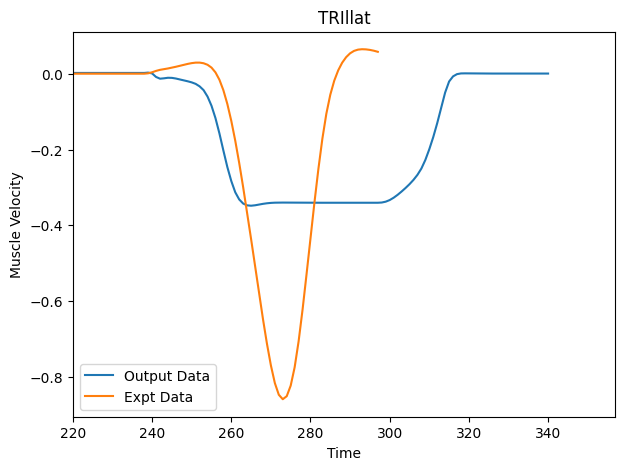

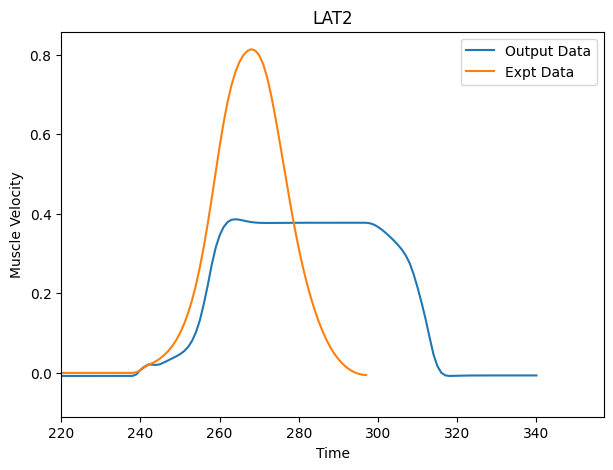

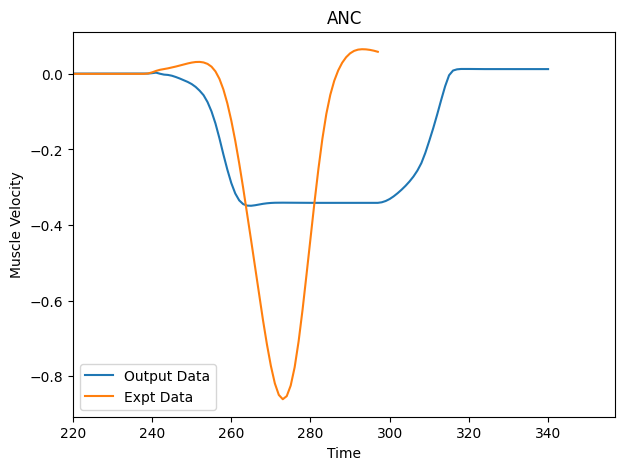

In [10]:
# Muscle list for dropdown menu TODO: All muscles indexing is wrong 
muscle_list = ['All Muscles', 'DELT1', 'DELT2', 'DELT3', 'SUPRA', 'INFRA', 'SUBSCAP', 'TMIN', 'TMAJ',
               'PMAJ1', 'PMAJ2', 'PMAJ3', 'LAT1', 'LAT2', 'LAT3', 'CORB', 'TRIlong', 'TRIllat', 'TRIlmat', 
               'ANC', 'SUP', 'BIClong', 'BICshort', 'BRA', 'BRD', 'ECRL', 'ECRB', 'ECU', 'FCR', 'FCU', 
               'PL', 'PT', 'PQ', 'FDSL', 'FDSR', 'FDSM', 'FDSI', 'FDPL', 'FDPR', 'FDPM', 'FDPI',
               'EDCL','EDCR', 'EDCM', 'EDCI', 'EDM', 'EIP', 'EPL', 'EPB', 'FPL', 'APL']

muscle_dict = {muscle: index - 1 for index, muscle in enumerate(muscle_list)}

# Object list for dropdown menu
object_list = ['Rings', 'Cubes', 'Balls', 'h.Cylinder', 'Boxes', 'v.Cylinder', 'Abstract']

# Get relative path of gui file
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# "Experimental Data" TODO: Which trial to use? Some kind of average? How to account for differing hold signals?
exp_file_path = os.path.join(parent_directory, "model", "monkey_data.mat")
mat_data = scipy.io.loadmat(exp_file_path)
mvm_data_expt = mat_data['targ'][0][0]
mvm_data_expt = pd.DataFrame(mvm_data_expt, index = muscle_list[1:])
# Sophie change: need different data format for metrics 
mvm_met_exp = mat_data['targ']


# Load the our output data. TODO: Right now it is one file, we need to change to adjust for object list AND increase in lesions
output_file_path = os.path.join(parent_directory, "model", "test_outputs.pickle")
mvm_data = pd.read_pickle(output_file_path)
mvm_met_test = np.load(output_file_path, allow_pickle=True)
inp_data = mat_data['inp']
for ind,trash in enumerate(inp_data[0]):
    inp_data[0][ind] = inp_data[0][ind][20]
hold_data = inp_data[0]

# TODO: What trial to use? First trial 
mvm_data = mvm_data[0]

# For plotting x-axis
time_axis = np.arange(2.2, 2.98, .01)

def plot_data(output_data, muscle, expt_data):
    if muscle_dict[muscle] > -1:

        output_data = output_data[:, muscle_dict[muscle]]
    else: 
        # TODO: Figure out what to do here. We want to prevent the user from selecting All Muscles *while* expt_data is already selected
        # (and therefore a single muscle was already selected). How/Should we go back to the single muscle or should we deselect the expt_data
        # if expt_data:
        #     print("Cannot display expt data against All Muscles. Please select a different muscle and try again")
        #     pass    
        output_data = output_data
    # output_data = output_data[220:]
    output_data.tolist()
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(output_data, label = "Output Data")
    if expt_data:
        expt_data_plot = mvm_data_expt.loc[muscle_name]
        # expt_data_plot = expt_data_plot[220:298]
        ax.plot(expt_data_plot, label = "Expt Data")
    ax.set_xlabel('Time')
    ax.set_ylabel('Muscle Velocity')
    ax.set_title(muscle_name)
    ax.set_xlim(left = 220)
    if muscle_dict[muscle] > -1: # im so sorry code quality 
        plt.legend()
    return fig

muscle_folder_path = os.path.join(parent_directory, 'muscles')
# sophie change: this was pointing to an old image i think so i just changed the dir
object_folder_path = os.path.join(parent_directory, 'objects/old')

# SOPHIE CHANGE: I DON'T KNOW WHERE TO PUT THESE, THEY NEED TO CHANGE BASED ON MODEL, BUT TAKE TOO LONG
#       TO BE COMPUTED FOR EVERY REFRESH
ground_brady_full, model_brady_full, p_val_brady = metrics.bradykinesia(mvm_met_test, mvm_met_exp[0])
ground_hypo_full, model_hypo_full, p_val_hypo = metrics.hypokinesia(mvm_met_test, mvm_met_exp[0])
ground_akin_full, model_akin_full, p_val_akin = metrics.akinesia(mvm_met_test, mvm_met_exp[0], hold_data, hold_data)
ground_trem_full, model_trem_full, p_val_trem = metrics.tremor_factor(mvm_met_test, mvm_met_exp[0])



# Function to find muscle_image
def muscle_image(muscle_name):
    if muscle_name is None:
        muscle_name = 'DELT1'
    muscle_file_path = os.path.join(muscle_folder_path, muscle_name + '.png')
    size = (450, 150)
    im = Image.open(muscle_file_path)
    # im = im.crop((102,202,1002,502))
# cropped = im.crop((0, 0, 200, 200))
# tk_im = ImageTk.PhotoImage(cropped)

    
    im = im.resize(size, resample=Image.BICUBIC)
    return ImageTk.PhotoImage(image = im)

# Function to find muscle_image
def object_image(object_name):
    object_file_path = os.path.join(object_folder_path, object_name + '.png')
    size = (150, 150)
    im = Image.open(object_file_path)
    im = im.resize(size, resample=Image.BICUBIC)
    return ImageTk.PhotoImage(image = im)

# GUI Layout
left_column = [
    [sg.Canvas(size=(640, 480), key='-CANVAS-')],
    [sg.Column([
        [sg.Combo(object_list, key = '-OBJECTS-', default_value = 'Rings', enable_events=True, size=(10, 20))],
        [sg.Combo(muscle_list, key = '-MUSCLES-', default_value = 'All Muscles', enable_events=True, size=(10, 20))]
            ]),
    sg.Image(size=(300, 200), key='-MUSCLE_IMAGE-'), sg.Image(size = (50, 50), key = "-OBJECT_IMAGE-")]
]
metrics_define = [
        [sg.Text('')],
        [sg.Text('BradyKinesia Measurement')],
        [sg.Text('Hypokinesia Measurement')],
        [sg.Text('Akinesia Measurement')],
        [sg.Text('Tremor Factor')]
    ]
metrics_ground = [
        [sg.Text('Ground')],
        [sg.Text('0', key = 'ground_brady')],
        [sg.Text('0', key = 'ground_hypo')],
        [sg.Text('0', key = 'ground_akin')],
        [sg.Text('0', key = 'ground_tremor')]
    ]
metrics_model = [
        [sg.Text('Model')],
        [sg.Text('0', key = 'model_brady')],
        [sg.Text('0', key = 'model_hypo')],
        [sg.Text('0', key = 'model_akin')],
        [sg.Text('0', key = 'model_tremor')]
    ]
metrics_compare = [
        [sg.Text('Compare')],
        [sg.Text('0', key = 'compare_brady')],
        [sg.Text('0', key = 'compare_hypo')],
        [sg.Text('0', key = 'compare_akin')],
        [sg.Text('0', key = 'compare_tremor')]
    ]
# For slider tick marks
ticks = ['0', '25', '50', '75', '100']
right_column = [
    [sg.HSeparator()],
    [sg.Text('External Influence on the Model', justification='center', font=('Helvetica', 16, 'bold'))],  # TODO: NOT FUNCTIONAL
    [sg.Slider(range=(0,100), orientation='h', resolution=25, size=(30, 20), default_value=0, key='-SLIDER-', enable_events=True, expand_x=True, tick_interval=25)],
    [sg.VerticalSeparator(pad=(0, 20))],
    [sg.HSeparator()],
    [sg.Text("Show Other Models", justification='right', font=('Helvetica', 16, 'bold'))],  
    [sg.Checkbox("Experimental Data", key = "expt", enable_events= True), 
        sg.Checkbox('Healthy Model')], # TODO: NOT FUNCTIONAL
    [sg.VerticalSeparator(pad=(0, 20))],
    [sg.HSeparator()],
    [sg.Text('Metrics', justification='center', font=('Helvetica', 16, 'bold'))], # TODO: CURRENTLY RANDOM
    [sg.Column(metrics_define), sg.VSeparator(), sg.Column(metrics_ground), sg.VSeparator(), sg.Column(metrics_model), sg.VSeparator(), sg.Column(metrics_compare)],
    [sg.HSeparator()],
    [sg.Text('Console Output:',justification='center', font=('Helvetica', 16, 'bold'))],
    [sg.Output(size = (70, 5))],
]

# Final Layout
layout = [ [[sg.Text("Neuro Engineering Capstone", font='Any 20 bold')]],
    [sg.Column(left_column), sg.VSeperator(), sg.Column(right_column)], 
]
# Create the GUI window
window = sg.Window('DataFrame Plotter', layout)

# Initialize canvas and fig
canvas_elem = window['-CANVAS-']
fig = None
canvas = None
o_image = None
m_image = None
# Event loop
while True:
    event, values = window.read()
    if event == sg.WINDOW_CLOSED or event == 'Exit':
        if fig is not None:
            plt.close(fig)  # Close the figure to prevent it from being printed
        break
    elif event == 'expt':
        muscle_name = values['-MUSCLES-']
        if muscle_name == "All Muscles":

            window['expt'].update(False)
            print("Cannot display expt data against All Muscles. Please select a different muscle and try again")
            continue
        else:
            fig = plot_data(mvm_data, muscle_name, values['expt'])
    elif event == "-OBJECTS-":
        o_image = object_image(values['-OBJECTS-'])
        window['-OBJECT_IMAGE-'].update(data=o_image)
    elif event == '-MUSCLES-':
        muscle_name = values['-MUSCLES-']
        if o_image is None:
            o_image = object_image(values['-OBJECTS-'])
            window['-OBJECT_IMAGE-'].update(data=o_image)
        if muscle_name == "All Muscles":
            fig = plot_data(mvm_data, muscle_name, values['expt'])
        else:
            # fig = plot_data(mvm_data.loc[muscle_name], muscle_name, values['expt']) 
            fig = plot_data(mvm_data, muscle_name, values['expt'])
        m_image = muscle_image(muscle_name,)
        window['-MUSCLE_IMAGE-'].update(data=m_image)

        # Random to implement GUI functionality. Change with Sophie's Super Statistics (SSS)

        ground_brady = round(ground_brady_full[muscle_dict[muscle_name]], 4)
        model_brady = round(model_brady_full[muscle_dict[muscle_name]], 4)

        
        ground_hypo = round(ground_hypo_full[muscle_dict[muscle_name]], 4)
        model_hypo = round(model_hypo_full[muscle_dict[muscle_name]], 4)

        ground_akin = round(ground_akin_full[muscle_dict[muscle_name]], 4)
        model_akin = round(model_akin_full[muscle_dict[muscle_name]], 4)

        ground_tremor = round(ground_trem_full[muscle_dict[muscle_name]], 4)
        model_tremor = round(model_trem_full[muscle_dict[muscle_name]], 4)

        window['ground_brady'].update(ground_brady)
        window['ground_hypo'].update(ground_hypo)
        window['ground_akin'].update(ground_akin)
        window['ground_tremor'].update(ground_tremor)

        window['model_brady'].update(model_brady)
        window['model_hypo'].update(model_hypo)
        window['model_akin'].update(model_akin)
        window['model_tremor'].update(model_tremor)

        window['compare_brady'].update(ground_brady - model_brady)
        window['compare_hypo'].update(ground_hypo - model_hypo)
        window['compare_akin'].update(ground_akin - model_akin)
        window['compare_tremor'].update(ground_tremor - model_tremor)

    # Update the plot in the GUI
    if fig is not None:
        if canvas:
            canvas.get_tk_widget().pack_forget()  # Remove the previous canvas
        canvas = FigureCanvasTkAgg(fig, canvas_elem.TKCanvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

    
window.close()


In [11]:
idx = 0
trial_info = (mat_data["trialInfo"])
norm = trial_info[idx][0]
if norm > 80:
    norm -= 10
norm -= 21
fact = norm // 10
norm = fact * 6 + norm % 10

In [12]:
norm

37